# Machine Learning Project

## Kernelized linear classification

#### Angelica Longo - 34314A

In [1]:
# IMPORT USEFUL LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from itertools import combinations
from itertools import combinations_with_replacement
np.random.seed(42)

In [2]:
# IMPORT FUNCTIONS
from ML_Functions import *

### 1. Data Pre-Processing


▶️ Preprocessing running...

Visualize distributions of variables:


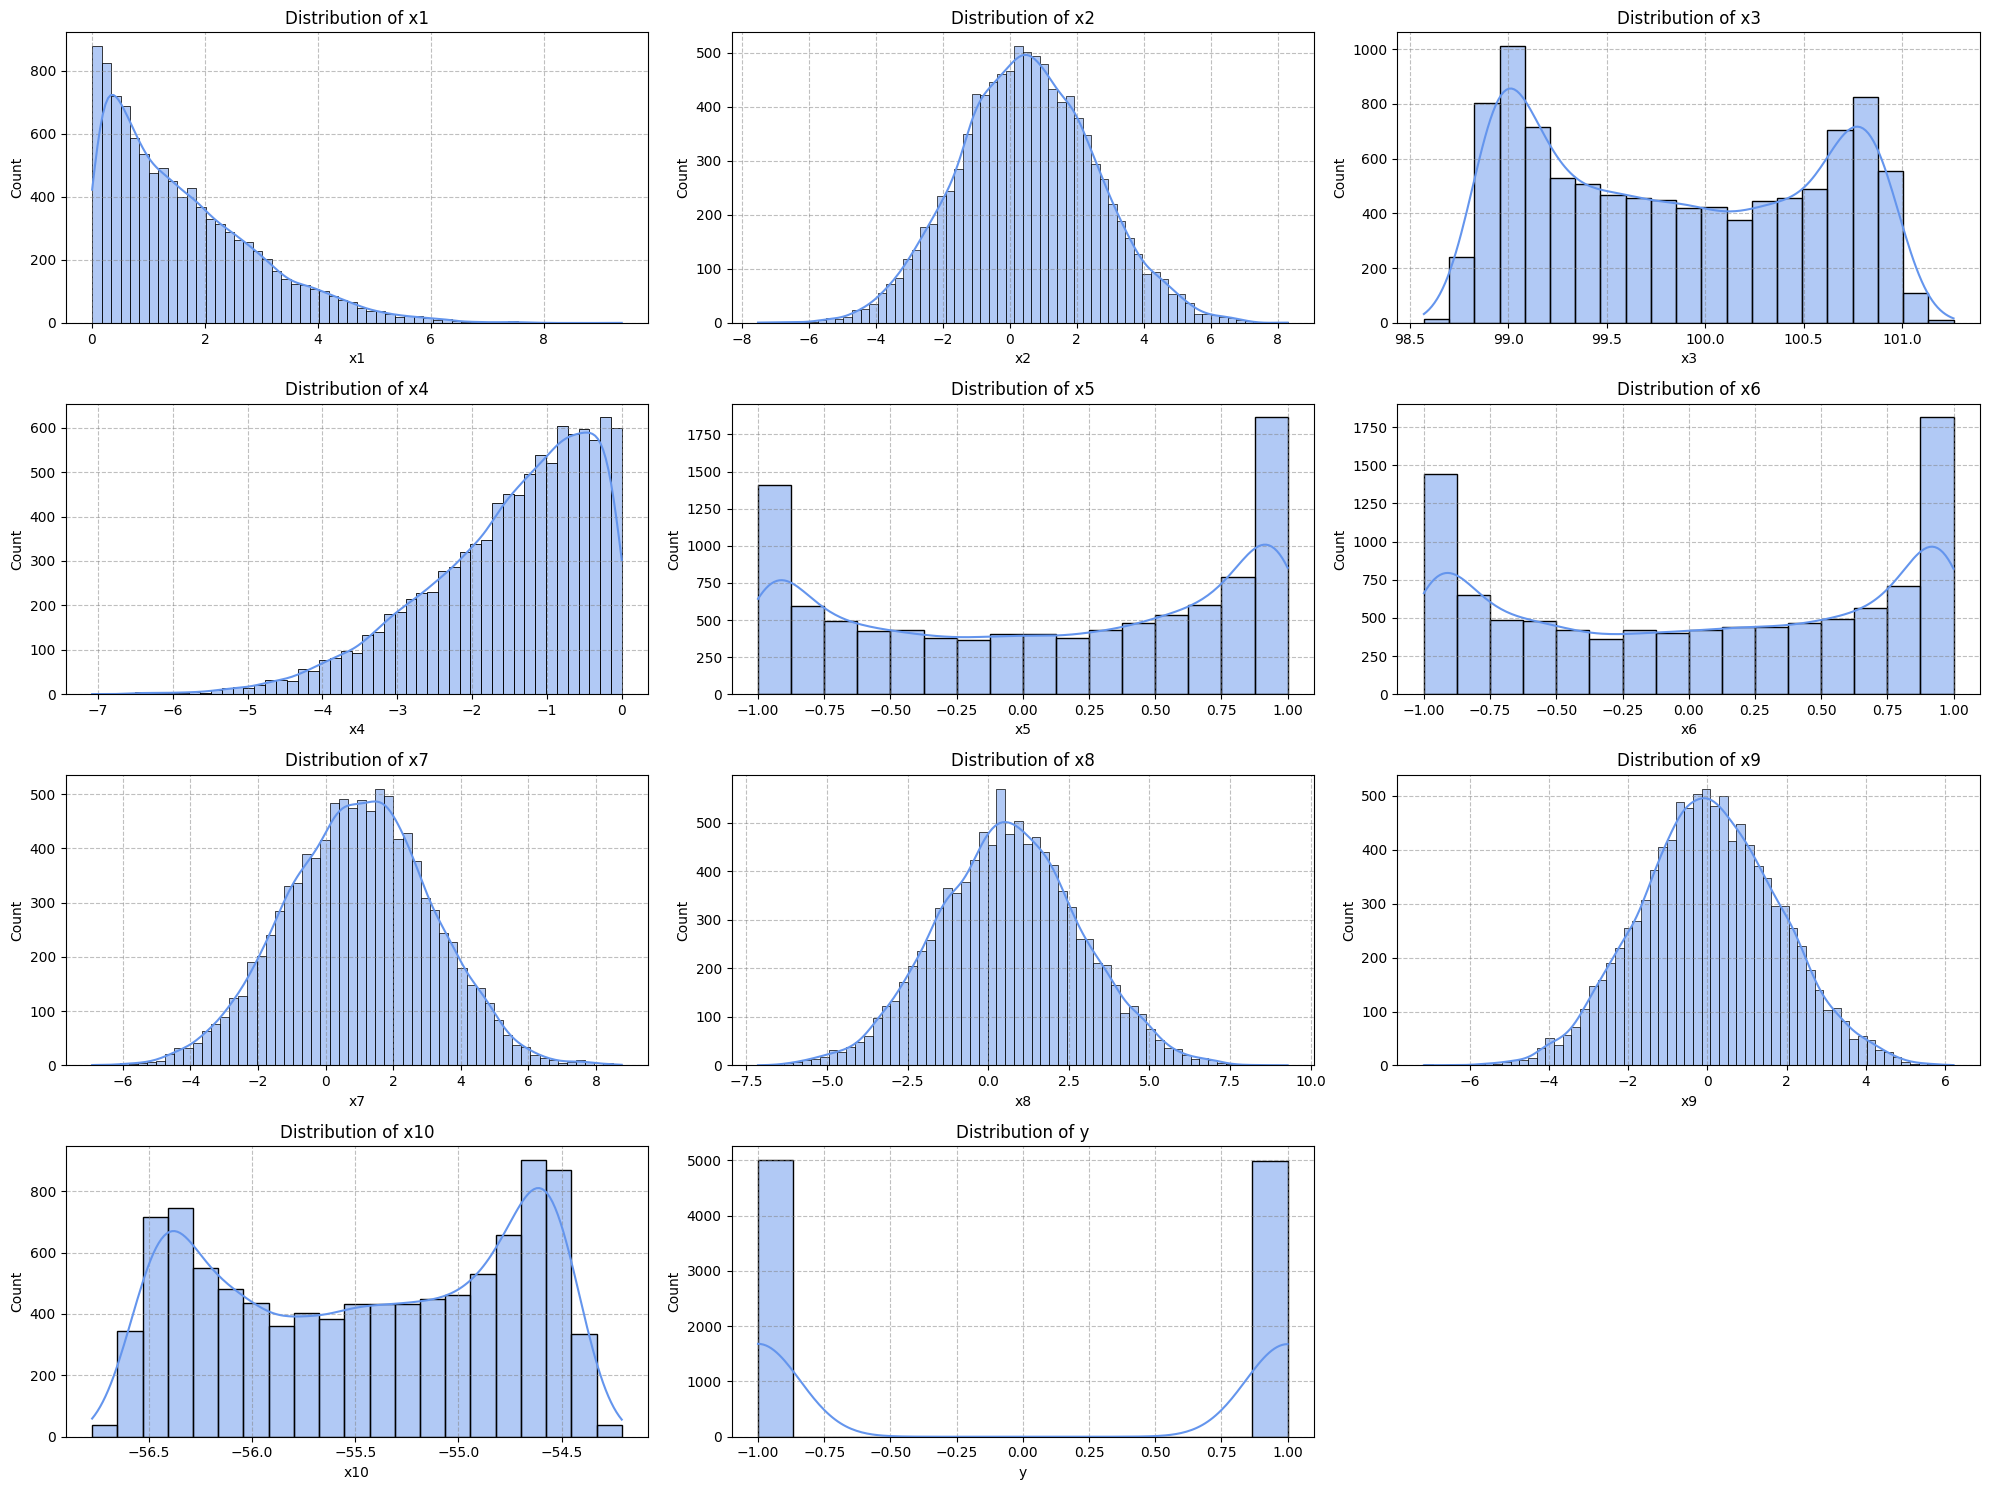


Dataset split into Train and Test sets.


Boxplots of variables:


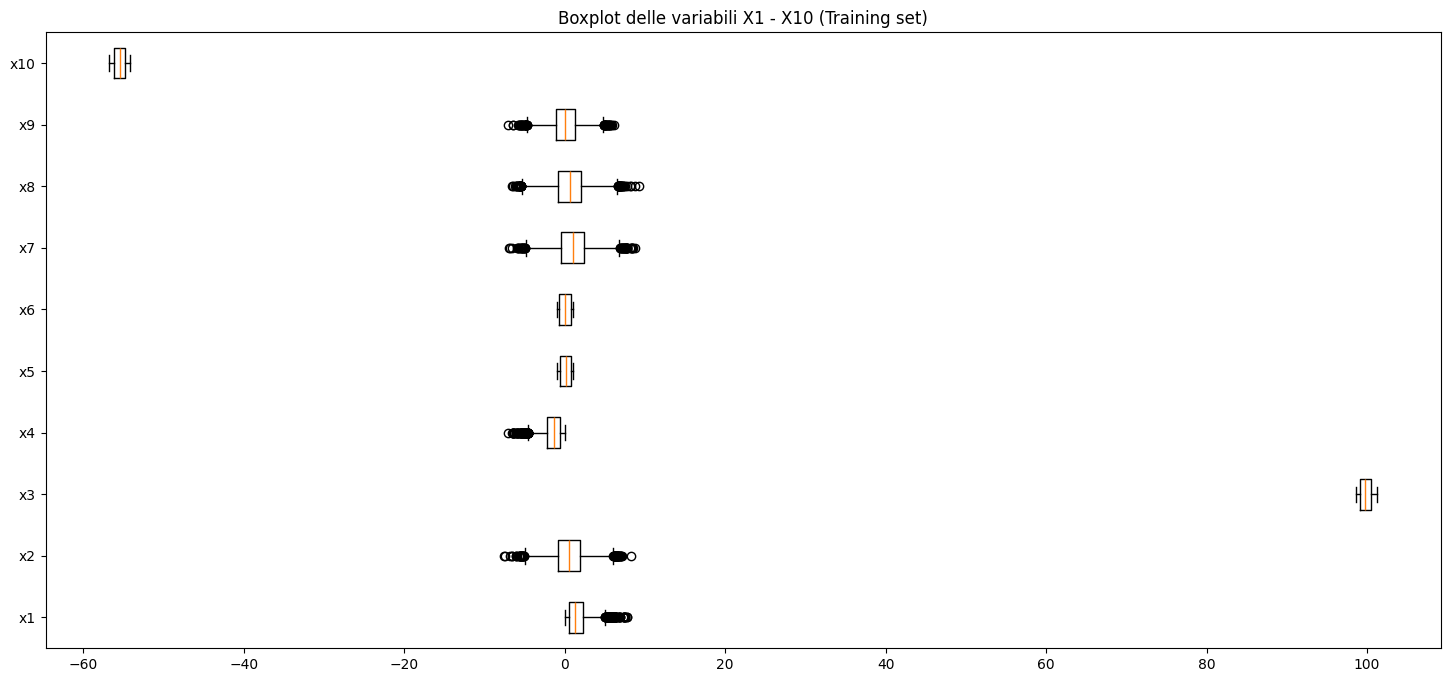


Removed outliers: 435


Check correlations:


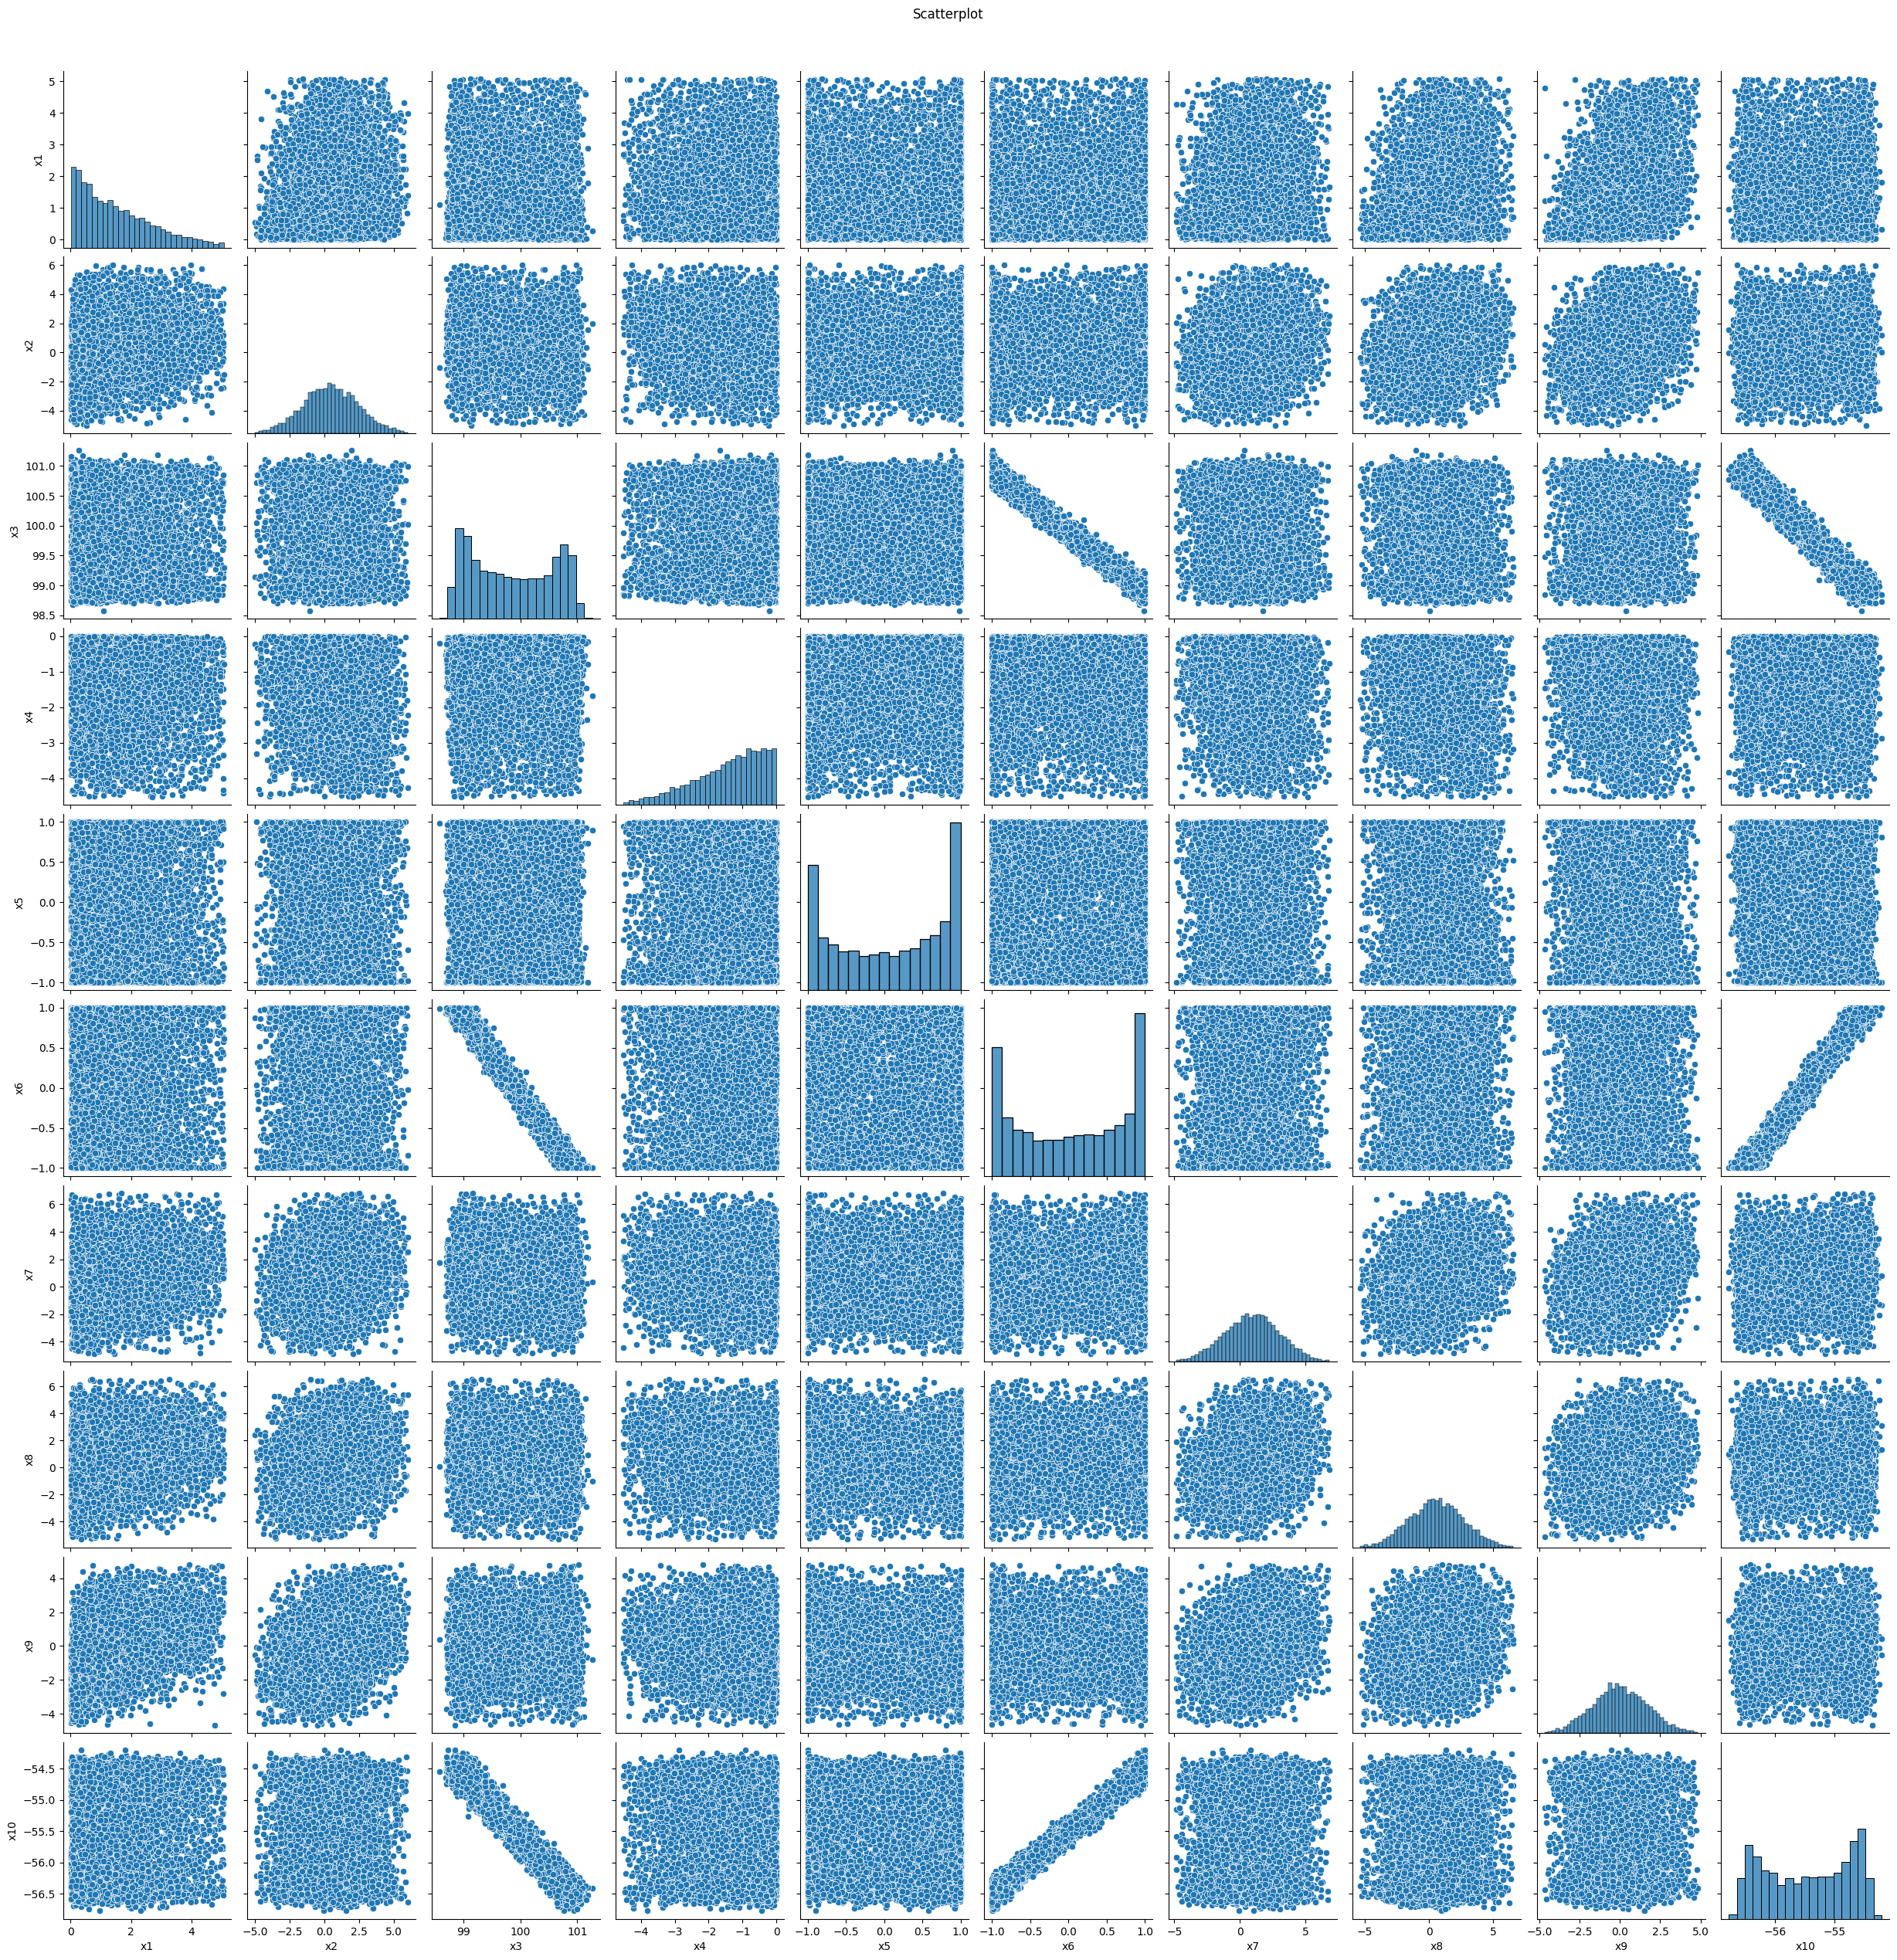

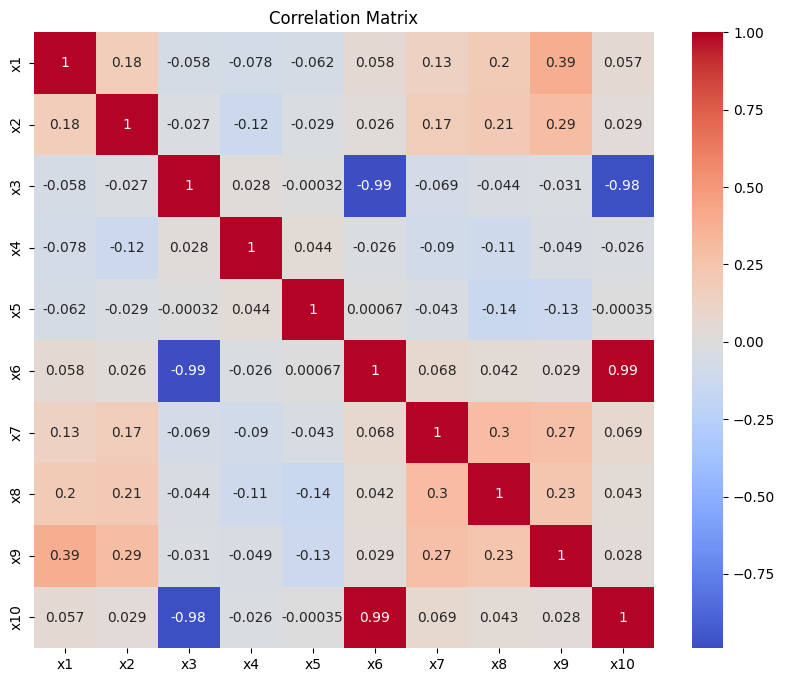


High correlated variables, then removed: {'x10', 'x6'}



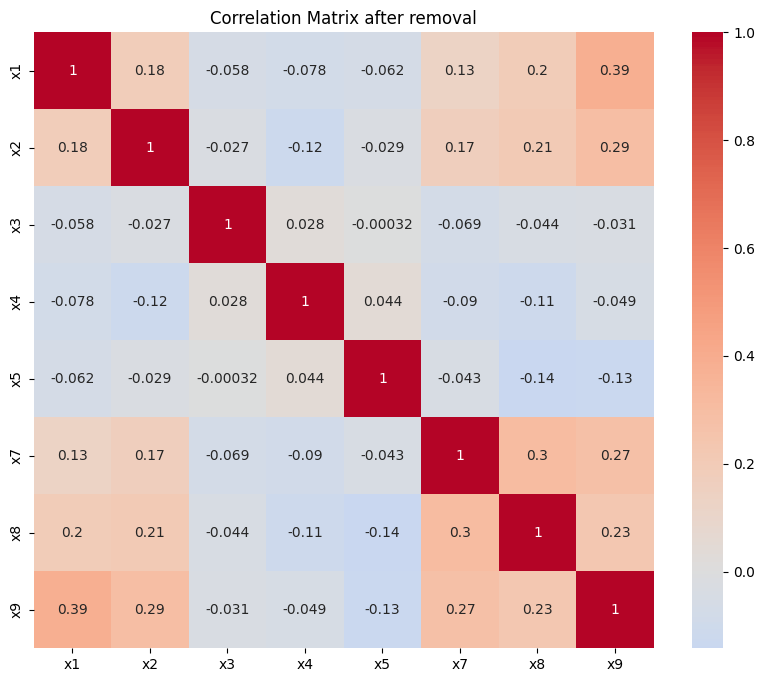


📊 Statistics of the training set:


x1           x2           x3           x4           x5  \
count  7565.000000  7565.000000  7565.000000  7565.000000  7565.000000   
mean      1.507794     0.470522    99.850220    -1.433707     0.080124   
std       1.193979     1.962075     0.711578     1.034165     0.705879   
min       0.002443    -4.990252    98.572455    -4.519782    -0.999999   
25%       0.508320    -0.886841    99.160373    -2.102879    -0.618762   
50%       1.253208     0.453024    99.805679    -1.229144     0.167511   
75%       2.263779     1.825177   100.552803    -0.593386     0.776518   
max       5.067727     6.015575   101.260768    -0.000003     1.000000   

                x7           x8           x9  
count  7565.000000  7565.000000  7565.000000  
mean      0.946816     0.583356     0.019144  
std       2.094444     2.110366     1.690809  
min      -4.868658    -5.334468    -4.674743  
25%      -0.495427    -0.888826    -1.126749  
50%       0.985639     0.582012    -0.013010  
75%       2.385708     2.013330     1.186029  
max       6.806107     6.553374     4.811665


📊 Statistics of the standardized training set:


x1            x2            x3            x4            x5  \
count  7.565000e+03  7.565000e+03  7.565000e+03  7.565000e+03  7.565000e+03   
mean   2.442050e-16 -1.502800e-17  1.243098e-14  8.641101e-17 -3.287376e-18   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.260785e+00 -2.783162e+00 -1.795677e+00 -2.984120e+00 -1.530183e+00   
25%   -8.370948e-01 -6.917997e-01 -9.694602e-01 -6.470638e-01 -9.900930e-01   
50%   -2.132248e-01 -8.918295e-03 -6.259484e-02  1.978057e-01  1.237996e-01   
75%    6.331645e-01  6.904195e-01  9.873581e-01  8.125602e-01  9.865632e-01   
max    2.981570e+00  2.826116e+00  1.982281e+00  1.386340e+00  1.303165e+00   

                 x7            x8            x9  
count  7.565000e+03  7.565000e+03  7.565000e+03  
mean   6.574751e-18 -8.453251e-18 -2.348125e-19  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -2.776620e+00 -2.804169e+00 -2.776119e+00  
25%   -6.886041e-01 -6.975958e-01 -6.777191e-01  
50%    1.853631e-02 -6.367543e-04 -1.901702e-02  
75%    6.870046e-01  6.775951e-01  6.901343e-01  
max    2.797540e+00  2.828902e+00  2.834454e+00


Distribution of labels (Training Set):
Classe -1: 3919 (51.80%)
Classe 1: 3646 (48.20%)

✅ Preprocessing completed!



In [3]:
# ------------------ PREPROCESSING CLASS ------------------

path = "\\Users\\angel\\Desktop\\DSE - UniMi\\Machine Learning - Project\\ML_Data\\data.csv"

pre = PreProcessing(path)
pre.run()

### 2. Algorithms implementation

#### 2.1 Perceptron Algorithm

In [4]:
# ------------------ PERCEPTRON CLASS ------------------
epoch_candidates = [5000, 10000, 20000, 30000]

perceptron = Perceptron(epoch_candidates)

perc_start_time = time.time()
optimal_epochs = perceptron.perceptron_cross_validation(pre.X_train, pre.y_train)
perc_end_time = time.time()
perc_execution_time = perc_end_time - perc_start_time
print(f"Time taken to compute Perceptron best hyperparameters: {perc_execution_time:.4f} seconds")

Evaluating for 5000 epochs...
Reached the maximum allowed epochs: 5000
Reached the maximum allowed epochs: 5000
Reached the maximum allowed epochs: 5000
Reached the maximum allowed epochs: 5000
Reached the maximum allowed epochs: 5000
Average accuracy for 5000 epochs: 0.6246
Evaluating for 10000 epochs...
Reached the maximum allowed epochs: 10000
Reached the maximum allowed epochs: 10000
Reached the maximum allowed epochs: 10000
Reached the maximum allowed epochs: 10000
Reached the maximum allowed epochs: 10000
Average accuracy for 10000 epochs: 0.6143
Evaluating for 20000 epochs...
Reached the maximum allowed epochs: 20000
Reached the maximum allowed epochs: 20000
Reached the maximum allowed epochs: 20000
Reached the maximum allowed epochs: 20000
Reached the maximum allowed epochs: 20000
Average accuracy for 20000 epochs: 0.5886
Evaluating for 30000 epochs...
Reached the maximum allowed epochs: 30000
Reached the maximum allowed epochs: 30000
Reached the maximum allowed epochs: 30000
R

In [5]:
perceptron_accuracy = perceptron.perceptron_evaluate(pre.X_train.values, pre.y_train.values, pre.X_test.values, pre.y_test.values)

Reached the maximum allowed epochs: 5000
Test Misclassification Rate: 0.3725


In [6]:
perceptron_weights = perceptron.weights
perceptron_weights

array([ 1.61284434, -1.17735021,  0.60951578,  1.25027502,  1.06471988,
        1.85627579,  0.78570791,  0.10206597])

#### 2.2 Pegasos SVMs Algorithm

In [7]:
## ------------------ PEGASOS CLASS ------------------
num_iterations_list=[2000, 5000, 10000, 20000, 30000]
regularization_params=[0.001, 0.1, 1, 2]
learning_rate_schedules=[lambda t: 1 / (1 + t)]
num_folds=5

pegasos = PegasosSVM(num_iterations_list, regularization_params, learning_rate_schedules)

peg_start_time = time.time()
optimal_iterations = pegasos.pegasos_cross_validation(pre.X_train.values, pre.y_train.values)
peg_end_time = time.time()
peg_execution_time = peg_end_time - peg_start_time
print(f"Time taken to compute Pegasos best hyperparameters: {peg_execution_time:.4f} seconds")

Iterations = 2000, Lambda = 0.001, Average accuracy = 0.7052
Iterations = 2000, Lambda = 0.1, Average accuracy = 0.7134
Iterations = 2000, Lambda = 1, Average accuracy = 0.7104
Iterations = 2000, Lambda = 2, Average accuracy = 0.7110
Iterations = 5000, Lambda = 0.001, Average accuracy = 0.7128
Iterations = 5000, Lambda = 0.1, Average accuracy = 0.7150
Iterations = 5000, Lambda = 1, Average accuracy = 0.7150
Iterations = 5000, Lambda = 2, Average accuracy = 0.7087
Iterations = 10000, Lambda = 0.001, Average accuracy = 0.7143
Iterations = 10000, Lambda = 0.1, Average accuracy = 0.7139
Iterations = 10000, Lambda = 1, Average accuracy = 0.7108
Iterations = 10000, Lambda = 2, Average accuracy = 0.7110
Iterations = 20000, Lambda = 0.001, Average accuracy = 0.7169
Iterations = 20000, Lambda = 0.1, Average accuracy = 0.7134
Iterations = 20000, Lambda = 1, Average accuracy = 0.7110
Iterations = 20000, Lambda = 2, Average accuracy = 0.7093
Iterations = 30000, Lambda = 0.001, Average accuracy = 0

In [8]:
pegasos_accuracy = pegasos.pegasos_evaluate(pre.X_train.values, pre.y_train.values, pre.X_test.values, pre.y_test.values)

Test Misclassification Rate: 0.2790


In [9]:
pegasos_weights = pegasos.weights  
pegasos_weights

array([ 0.26171624, -0.01451212,  0.18851688, -0.29704176,  0.23557261,
        0.32659806,  0.54162728,  0.14142364])

#### 2.3 Logistic regression

In [10]:
# ------------------ LOGISTIC CLASS ------------------
num_iterations_list=[2000, 5000, 10000, 20000, 30000]
regularization_params=[0.001, 0.1, 1, 2]
learning_rate_schedules=[lambda t: 1 / (1 + t)]
num_folds=5

log = Logistic(num_iterations_list, regularization_params, learning_rate_schedules)

log_start_time = time.time()
optimal_iterations = log.logistic_cross_validation(pre.X_train.values, pre.y_train.values)
log_end_time = time.time()
log_execution_time = log_end_time - log_start_time
print(f"Time taken to compute Logistic Regression best hyperparameters: {log_execution_time:.4f} seconds")

Iterations = 2000, Lambda = 0.001, Average accuracy = 0.7010
Iterations = 2000, Lambda = 0.1, Average accuracy = 0.7114
Iterations = 2000, Lambda = 1, Average accuracy = 0.7096
Iterations = 2000, Lambda = 2, Average accuracy = 0.7081
Iterations = 5000, Lambda = 0.001, Average accuracy = 0.7055
Iterations = 5000, Lambda = 0.1, Average accuracy = 0.7098
Iterations = 5000, Lambda = 1, Average accuracy = 0.7159
Iterations = 5000, Lambda = 2, Average accuracy = 0.7105
Iterations = 10000, Lambda = 0.001, Average accuracy = 0.7102
Iterations = 10000, Lambda = 0.1, Average accuracy = 0.7113
Iterations = 10000, Lambda = 1, Average accuracy = 0.7130
Iterations = 10000, Lambda = 2, Average accuracy = 0.7100
Iterations = 20000, Lambda = 0.001, Average accuracy = 0.7125
Iterations = 20000, Lambda = 0.1, Average accuracy = 0.7130
Iterations = 20000, Lambda = 1, Average accuracy = 0.7121
Iterations = 20000, Lambda = 2, Average accuracy = 0.7108
Iterations = 30000, Lambda = 0.001, Average accuracy = 0

In [11]:
logistic_accuracy = log.logistic_evaluate(pre.X_train.values, pre.y_train.values, pre.X_test.values, pre.y_test.values)

Test Misclassification Rate: 0.2885


In [12]:
logistic_weights = log.weights 
logistic_weights

array([ 0.06676516,  0.01285832,  0.02040675, -0.07409261,  0.03051847,
        0.08351248,  0.13514618,  0.05942224])

---
### 3. Feature expansion

In [13]:
# ------------------ FEATURE EXPANSION CLASS ------------------
exp = FeatureExpansion()

# Expand features test and training sets
X_poly_train = exp.expand_polynomial_features(pre.X_train.values)
X_poly_test = exp.expand_polynomial_features(pre.X_test.values)
exp.describe_expansion(pre.X_train, X_poly_train)

Shape of original features: (7565, 8)

Shape of features after polynomial expansion: (7565, 44)

New list of features: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x4', 'x1*x5', 'x1*x6', 'x1*x7', 'x1*x8', 'x2*x2', 'x2*x3', 'x2*x4', 'x2*x5', 'x2*x6', 'x2*x7', 'x2*x8', 'x3*x3', 'x3*x4', 'x3*x5', 'x3*x6', 'x3*x7', 'x3*x8', 'x4*x4', 'x4*x5', 'x4*x6', 'x4*x7', 'x4*x8', 'x5*x5', 'x5*x6', 'x5*x7', 'x5*x8', 'x6*x6', 'x6*x7', 'x6*x8', 'x7*x7', 'x7*x8', 'x8*x8']


#### 3.1 Expanded Perceptron

In [14]:
# ------------------ EXPANDED PERCEPTRON ------------------
exp_perc_start_time = time.time()
perceptron.perceptron_cross_validation(X_poly_train, pre.y_train)
exp_perc_end_time = time.time()
exp_perc_execution_time = exp_perc_end_time - exp_perc_start_time
print(f"Time taken to compute Expanded Perceptron best hyperparameters: {exp_perc_execution_time:.4f} seconds")

perceptron.perceptron_evaluate(X_poly_train, pre.y_train.values, X_poly_test, pre.y_test.values)

Evaluating for 100 epochs...
Reached the maximum allowed epochs: 100
Reached the maximum allowed epochs: 100
Reached the maximum allowed epochs: 100
Reached the maximum allowed epochs: 100
Reached the maximum allowed epochs: 100
Average accuracy for 100 epochs: 0.9169
Evaluating for 500 epochs...
Reached the maximum allowed epochs: 500
Reached the maximum allowed epochs: 500
Reached the maximum allowed epochs: 500
Reached the maximum allowed epochs: 500
Reached the maximum allowed epochs: 500
Average accuracy for 500 epochs: 0.9257
Evaluating for 1000 epochs...
Reached the maximum allowed epochs: 1000
Reached the maximum allowed epochs: 1000
Reached the maximum allowed epochs: 1000
Reached the maximum allowed epochs: 1000
Reached the maximum allowed epochs: 1000
Average accuracy for 1000 epochs: 0.9240
Evaluating for 2000 epochs...
Reached the maximum allowed epochs: 2000
Reached the maximum allowed epochs: 2000
Reached the maximum allowed epochs: 2000
Reached the maximum allowed epoch

In [15]:
poly_perceptron_weights = perceptron.weights
poly_perceptron_weights

array([ 2.68907808e+01, -3.17737749e+00,  1.10320968e+01, -1.77072241e+01,
        3.32032828e+01,  2.39674820e+01,  6.84237544e+01,  2.64280938e+01,
       -6.85704244e+00, -1.54218190e+00, -3.11271762e+00, -8.66790518e+00,
       -1.21799433e+01, -1.03293496e+01, -6.22223564e+00,  3.08979264e+00,
        1.35431428e+00,  1.02308422e+00, -1.43258508e+01, -7.55170157e-01,
       -2.83484507e-01,  4.33279430e+01, -3.46487594e+00, -4.49107986e+00,
        5.06180679e+00,  1.41466229e+00, -2.43375482e-01,  7.39165977e+00,
        1.28673299e+02,  2.08716351e-02,  7.35965295e+00, -3.70193733e+00,
       -8.25319042e+00,  5.91841375e+00,  6.76062754e+00, -4.70938052e+00,
       -3.85299439e+01, -1.47209658e+00, -5.02692260e-01,  1.05627868e+01,
       -3.09530485e+00,  2.67462297e+00, -2.10261665e+00, -7.55057612e+00])

#### 3.2 Expanded Pegasos

In [16]:
# ------------------ EXPANDED PEGASOS ------------------
exp_peg_start_time = time.time()
pegasos.pegasos_cross_validation(X_poly_train, pre.y_train)
exp_peg_end_time = time.time()
exp_peg_execution_time = exp_peg_end_time - exp_peg_start_time
print(f"Time taken to compute Expanded Pegasos best hyperparameters: {exp_peg_execution_time:.4f} seconds")

pegasos.pegasos_evaluate(X_poly_train, pre.y_train.values, X_poly_test, pre.y_test.values)

Iterations = 2000, Lambda = 0.001, Average accuracy = 0.7799
Iterations = 2000, Lambda = 0.1, Average accuracy = 0.8296
Iterations = 2000, Lambda = 1, Average accuracy = 0.8587
Iterations = 2000, Lambda = 2, Average accuracy = 0.8477
Iterations = 5000, Lambda = 0.001, Average accuracy = 0.7881
Iterations = 5000, Lambda = 0.1, Average accuracy = 0.8640
Iterations = 5000, Lambda = 1, Average accuracy = 0.8712
Iterations = 5000, Lambda = 2, Average accuracy = 0.8672
Iterations = 10000, Lambda = 0.001, Average accuracy = 0.8067
Iterations = 10000, Lambda = 0.1, Average accuracy = 0.8755
Iterations = 10000, Lambda = 1, Average accuracy = 0.8677
Iterations = 10000, Lambda = 2, Average accuracy = 0.8724
Iterations = 20000, Lambda = 0.001, Average accuracy = 0.8378
Iterations = 20000, Lambda = 0.1, Average accuracy = 0.8702
Iterations = 20000, Lambda = 1, Average accuracy = 0.8706
Iterations = 20000, Lambda = 2, Average accuracy = 0.8744
Iterations = 30000, Lambda = 0.001, Average accuracy = 0

In [17]:
poly_pegasos_weights = pegasos.weights
poly_pegasos_weights

array([ 0.35589621,  0.03603291,  0.18856627, -0.25481367,  0.30242795,
        0.26352063,  0.70639394,  0.26852527, -0.18310903,  0.13956547,
       -0.12993947, -0.08181382, -0.0101574 , -0.06423508, -0.02942488,
        0.09520657,  0.14179639, -0.07564155, -0.1507654 , -0.06634655,
       -0.03221367,  0.3112453 ,  0.06109178, -0.04143372,  0.06327209,
       -0.06669358,  0.04500628, -0.04666498,  0.95035223, -0.02368137,
        0.07973205,  0.00984883, -0.04494493,  0.11262192,  0.09711166,
       -0.02640199, -0.33845532,  0.08500783,  0.04689803,  0.11197356,
        0.01074494,  0.00847809,  0.11541275,  0.1025095 ])

#### 3.3 Expanded Logistic

In [18]:
# ------------------ EXPANDED LOGISTIC ------------------
exp_log_start_time = time.time()
log.logistic_cross_validation(X_poly_train, pre.y_train)
exp_log_end_time = time.time()
exp_log_execution_time = exp_log_end_time - exp_log_start_time
print(f"Time taken to compute Expanded Logistic best hyperparameters: {exp_log_execution_time:.4f} seconds")

log.logistic_evaluate(X_poly_train, pre.y_train.values, X_poly_test, pre.y_test.values)

Iterations = 2000, Lambda = 0.001, Average accuracy = 0.7837
Iterations = 2000, Lambda = 0.1, Average accuracy = 0.8493
Iterations = 2000, Lambda = 1, Average accuracy = 0.8656
Iterations = 2000, Lambda = 2, Average accuracy = 0.8539
Iterations = 5000, Lambda = 0.001, Average accuracy = 0.8295
Iterations = 5000, Lambda = 0.1, Average accuracy = 0.8490
Iterations = 5000, Lambda = 1, Average accuracy = 0.8773
Iterations = 5000, Lambda = 2, Average accuracy = 0.8616
Iterations = 10000, Lambda = 0.001, Average accuracy = 0.8410
Iterations = 10000, Lambda = 0.1, Average accuracy = 0.8689
Iterations = 10000, Lambda = 1, Average accuracy = 0.8794
Iterations = 10000, Lambda = 2, Average accuracy = 0.8575
Iterations = 20000, Lambda = 0.001, Average accuracy = 0.8402
Iterations = 20000, Lambda = 0.1, Average accuracy = 0.8806
Iterations = 20000, Lambda = 1, Average accuracy = 0.8792
Iterations = 20000, Lambda = 2, Average accuracy = 0.8611
Iterations = 30000, Lambda = 0.001, Average accuracy = 0

In [19]:
poly_logistic_weights = log.weights
poly_logistic_weights

array([ 0.06326139,  0.02061858,  0.02620854, -0.06096081,  0.03924185,
        0.08667841,  0.1430603 ,  0.05741214,  0.00457318,  0.0601409 ,
       -0.02879489, -0.0066068 , -0.03302161, -0.02398494, -0.01392712,
        0.03339779,  0.05418174, -0.00629611, -0.01815667, -0.02110028,
        0.01408779,  0.05412692,  0.01445367, -0.01436233, -0.00517254,
       -0.02271861,  0.02782099,  0.0212807 ,  0.18556543,  0.00699409,
        0.01020162,  0.00500731, -0.00377794,  0.00618976,  0.02026172,
       -0.00949132, -0.05923539, -0.00839009,  0.00761957,  0.00455618,
       -0.00617678,  0.00280967,  0.02257998,  0.02849146])

#### 3.4 Visual Comparison - Base and Expanded Models

- Visualization of test mislassification comparison:

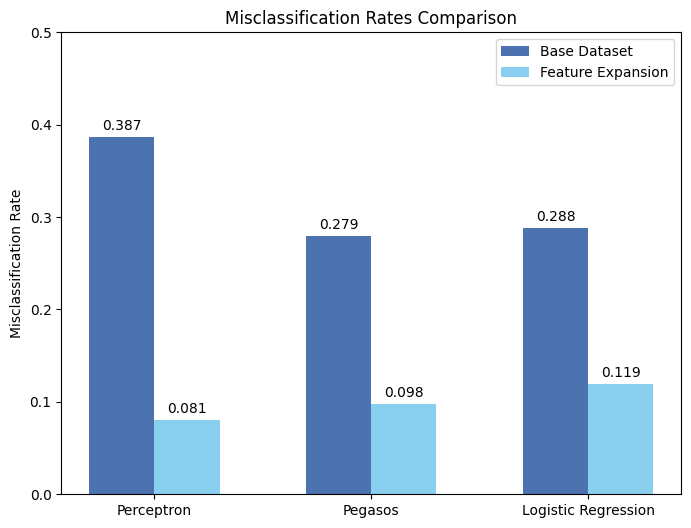

In [22]:
algorithms = ["Perceptron", "Pegasos", "Logistic Regression"]
base_misrates = [0.3870, 0.2790, 0.2885]
expanded_misrates = [0.0805, 0.0975, 0.1195]

x = np.arange(len(algorithms))
width = 0.3

fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - width/2, base_misrates, width, color='#4C72B0', label="Base Dataset")
bars2 = ax.bar(x + width/2, expanded_misrates, width, color='#89CFF0', label="Feature Expansion")

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel("Misclassification Rate")
ax.set_title("Misclassification Rates Comparison")
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.set_ylim(0, 0.5)
ax.legend()

plt.savefig("test_misclass_comparison.png", dpi=300, bbox_inches='tight')
plt.show()


- Visualization of training and test mislassification comparison:

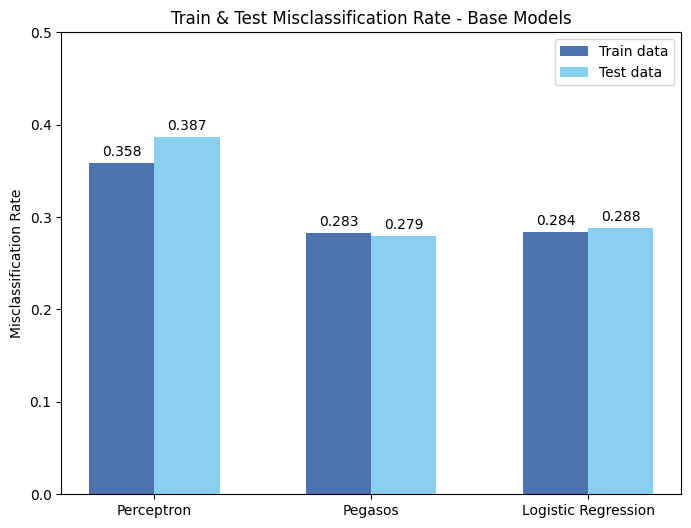

In [23]:
# Base Models
base_train_mis = [1 - acc for acc in [0.6418, 0.7171, 0.7159]]
base_test_mis = [0.3870, 0.2790, 0.2885]

fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x - width/2, base_train_mis, width, color='#4C72B0', label="Train data")
bars2 = ax.bar(x + width/2, base_test_mis, width, color='#89CFF0', label="Test data")

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel("Misclassification Rate")
ax.set_title("Train & Test Misclassification Rate - Base Models")
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.set_ylim(0, 0.5)
ax.legend()

plt.savefig("train_test_misclass_base.png", dpi=300, bbox_inches='tight')
plt.show()

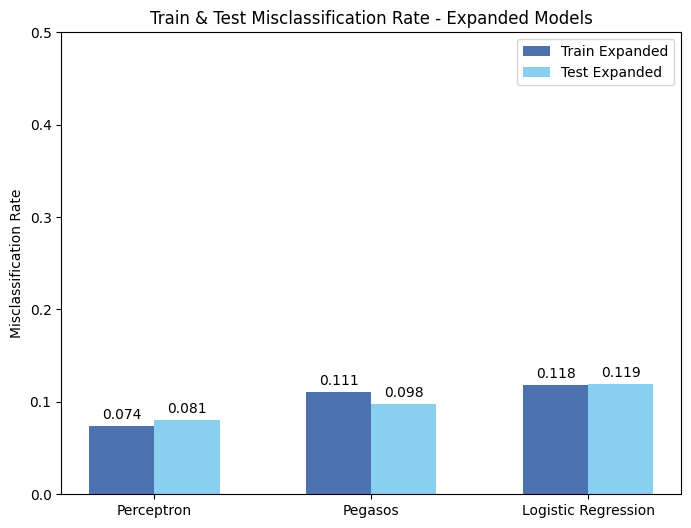

In [24]:
# Expanded models
expanded_train_mis = [1 - acc for acc in [0.9261, 0.8890, 0.8818]]
expanded_test_mis = [0.0805, 0.0975, 0.1195]

fig, ax = plt.subplots(figsize=(8, 6))

bars3 = ax.bar(x - width/2, expanded_train_mis, width, color='#4C72B0', label="Train Expanded")
bars4 = ax.bar(x + width/2, expanded_test_mis, width, color='#89CFF0', label="Test Expanded")

for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel("Misclassification Rate")
ax.set_title("Train & Test Misclassification Rate - Expanded Models")
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.set_ylim(0, 0.5)
ax.legend()

plt.savefig("train_test_misclass_expanded.png", dpi=300, bbox_inches='tight')
plt.show()

### 4. Weights comparison

Perceptron   Pegasos  Logistic
Feature                                
x1         1.612844  0.261716  0.066765
x2        -1.177350 -0.014512  0.012858
x3         0.609516  0.188517  0.020407
x4         1.250275 -0.297042 -0.074093
x5         1.064720  0.235573  0.030518
x7         1.856276  0.326598  0.083512
x8         0.785708  0.541627  0.135146
x9         0.102066  0.141424  0.059422

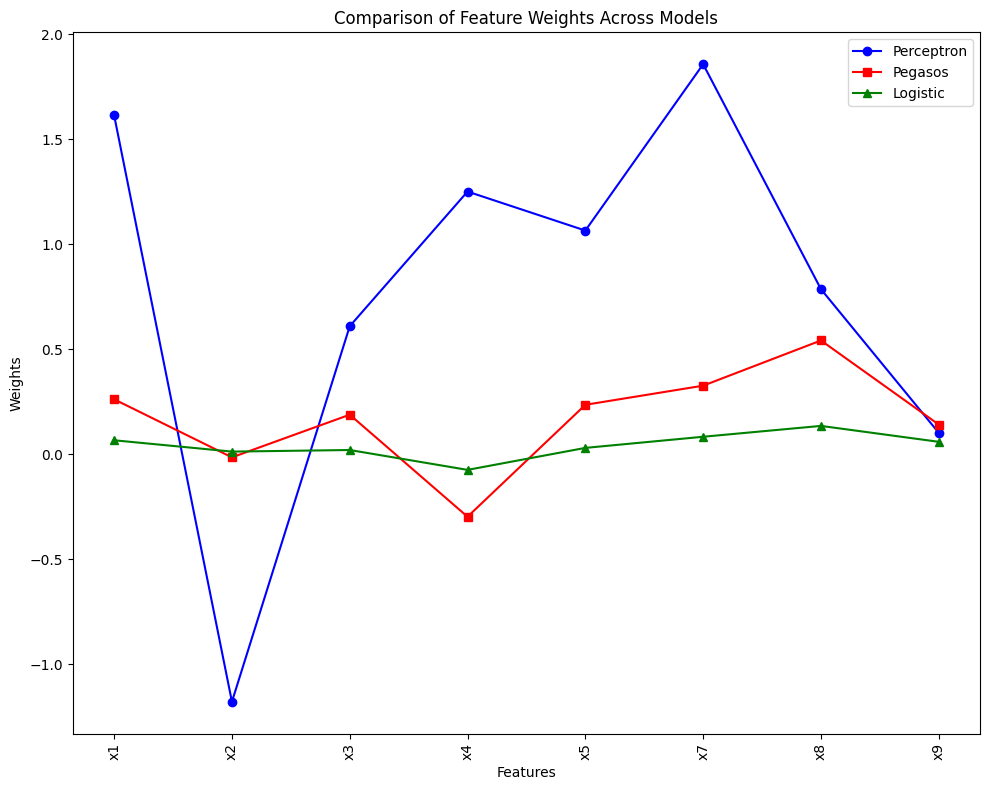

In [20]:
visualizer = WeightVisualizer()
display(visualizer.generate_latex_table(perceptron_weights, pegasos_weights, logistic_weights, pre.X_train))
visualizer.plot_weight_comparison(perceptron_weights, pegasos_weights, logistic_weights)

In [21]:
display(visualizer.generate_polynomial_latex_table(poly_perceptron_weights, poly_pegasos_weights, poly_logistic_weights))

Feature  Perceptron   Pegasos  Logistic
0       x1   26.890781  0.355896  0.063261
1       x2   -3.177377  0.036033  0.020619
2       x3   11.032097  0.188566  0.026209
3       x4  -17.707224 -0.254814 -0.060961
4       x5   33.203283  0.302428  0.039242
5       x6   23.967482  0.263521  0.086678
6       x7   68.423754  0.706394  0.143060
7       x8   26.428094  0.268525  0.057412
8     x1^2   -6.857042 -0.183109  0.004573
9     x2^2   -1.542182  0.139565  0.060141
10    x3^2   -3.112718 -0.129939 -0.028795
11    x4^2   -8.667905 -0.081814 -0.006607
12    x5^2  -12.179943 -0.010157 -0.033022
13    x6^2  -10.329350 -0.064235 -0.023985
14    x7^2   -6.222236 -0.029425 -0.013927
15    x8^2    3.089793  0.095207  0.033398
16   x1*x2    1.354314  0.141796  0.054182
17   x1*x3    1.023084 -0.075642 -0.006296
18   x1*x4  -14.325851 -0.150765 -0.018157
19   x1*x5   -0.755170 -0.066347 -0.021100
20   x1*x6   -0.283485 -0.032214  0.014088
21   x1*x7   43.327943  0.311245  0.054127
22   x1*x8   -3.464876  0.061092  0.014454
23   x2*x3   -4.491080 -0.041434 -0.014362
24   x2*x4    5.061807  0.063272 -0.005173
25   x2*x5    1.414662 -0.066694 -0.022719
26   x2*x6   -0.243375  0.045006  0.027821
27   x2*x7    7.391660 -0.046665  0.021281
28   x2*x8  128.673299  0.950352  0.185565
29   x3*x4    0.020872 -0.023681  0.006994
30   x3*x5    7.359653  0.079732  0.010202
31   x3*x6   -3.701937  0.009849  0.005007
32   x3*x7   -8.253190 -0.044945 -0.003778
33   x3*x8    5.918414  0.112622  0.006190
34   x4*x5    6.760628  0.097112  0.020262
35   x4*x6   -4.709381 -0.026402 -0.009491
36   x4*x7  -38.529944 -0.338455 -0.059235
37   x4*x8   -1.472097  0.085008 -0.008390
38   x5*x6   -0.502692  0.046898  0.007620
39   x5*x7   10.562787  0.111974  0.004556
40   x5*x8   -3.095305  0.010745 -0.006177
41   x6*x7    2.674623  0.008478  0.002810
42   x6*x8   -2.102617  0.115413  0.022580
43   x7*x8   -7.550576  0.102510  0.028491

### 5. Kernel models

#### 5.1 Kernelized Perceptron

In [4]:
# ------------------ KERNELIZED PERCEPTRON CLASS ------------------
kp = KernelizedPerceptron()

In [7]:
# Gaussian Kernelized Perceptron
gkp_param_grid = {
    'sigmas': [0.1, 0.5, 1, 2],  # Per il kernel RBF
    'degrees': [2, 3],  # Per il kernel polinomiale
    'constants': [0, 1]  # Per il kernel polinomiale
}
gkp_epoch_options = [10, 15, 20]

In [8]:
gkp_start_time = time.time()
gkp_best_params = kp.kp_cross_validation(pre.X_train.values, pre.y_train.values, 'rbf', gkp_param_grid, gkp_epoch_options, k=2)
gkp_end_time = time.time()
gkp_execution_time = gkp_end_time - gkp_start_time
print(f"Time taken to compute Gaussian Kernelized Perceptron best hyperparameters: {gkp_execution_time:.4f} seconds")

Testing kernel type = rbf, sigma = 0.1, epochs = 10
Converged after 5 epochs.
Converged after 6 epochs.
Accuracy with max_epochs = 10, sigma = 0.1 is 0.7964
Testing kernel type = rbf, sigma = 0.1, epochs = 15
Converged after 5 epochs.
Converged after 6 epochs.
Accuracy with max_epochs = 15, sigma = 0.1 is 0.7964
Testing kernel type = rbf, sigma = 0.1, epochs = 20
Converged after 5 epochs.
Converged after 6 epochs.
Accuracy with max_epochs = 20, sigma = 0.1 is 0.7964
Testing kernel type = rbf, sigma = 0.5, epochs = 10
Converged after 5 epochs.
Converged after 5 epochs.
Accuracy with max_epochs = 10, sigma = 0.5 is 0.8434
Testing kernel type = rbf, sigma = 0.5, epochs = 15
Converged after 5 epochs.
Converged after 5 epochs.
Accuracy with max_epochs = 15, sigma = 0.5 is 0.8434
Testing kernel type = rbf, sigma = 0.5, epochs = 20
Converged after 5 epochs.
Converged after 5 epochs.
Accuracy with max_epochs = 20, sigma = 0.5 is 0.8434
Testing kernel type = rbf, sigma = 1, epochs = 10
Failed t

In [9]:
gkp_sigma_best = gkp_best_params['sigma']
gkp_epochs_best = gkp_best_params['epochs']
gkp_kernel_func = lambda v1, v2: kp.kp_gaussian_kernel(v1, v2, gkp_sigma_best)
kp.kp_train(pre.X_train.values, pre.y_train.values, gkp_kernel_func, max_epochs = gkp_epochs_best)
kp.kp_evaluate_test(pre.X_test.values, pre.y_test.values, gkp_kernel_func)

Failed to converge within the specified epochs.
Test set accuracy: 0.9415


In [5]:
# Polynomial Kernelized Perceptron
pkp_param_grid = {
    'sigmas': [0.1, 0.5], 
    'degrees': [2, 3],  
    'constants': [0, 1]  
}
pkp_epoch_options = [10, 20]

In [6]:
pkp_start_time = time.time()
pkp_best_params = kp.kp_cross_validation(pre.X_train.values, pre.y_train.values, 'polynomial', pkp_param_grid, pkp_epoch_options, k=2)
pkp_end_time = time.time()
pkp_execution_time = pkp_end_time - pkp_start_time
print(f"Time taken to compute Polynomial Kernelized Perceptron best hyperparameters: {pkp_execution_time:.4f} seconds")

Testing kernel type = polynomial, degree = 2, constant = 0, epochs = 10
Failed to converge within the specified epochs.
Failed to converge within the specified epochs.
Accuracy with max_epochs = 10, degree = 2, constant = 0 is 0.7071
Testing kernel type = polynomial, degree = 2, constant = 0, epochs = 20
Failed to converge within the specified epochs.
Failed to converge within the specified epochs.
Accuracy with max_epochs = 20, degree = 2, constant = 0 is 0.6966
Testing kernel type = polynomial, degree = 2, constant = 1, epochs = 10
Failed to converge within the specified epochs.
Failed to converge within the specified epochs.
Accuracy with max_epochs = 10, degree = 2, constant = 1 is 0.9212
Testing kernel type = polynomial, degree = 2, constant = 1, epochs = 20
Failed to converge within the specified epochs.
Failed to converge within the specified epochs.
Accuracy with max_epochs = 20, degree = 2, constant = 1 is 0.9221
Testing kernel type = polynomial, degree = 3, constant = 0, epoc

In [7]:
pkp_kernel_func = lambda v1, v2: kp.kp_polynomial_kernel(v1, v2, pkp_best_params['degree'], pkp_best_params['constant'])
kp.kp_train(pre.X_train.values, pre.y_train.values, pkp_kernel_func, max_epochs = pkp_best_params['epochs'])
kp.kp_evaluate_test(pre.X_test.values, pre.y_test.values, pkp_kernel_func)

Failed to converge within the specified epochs.
Test set accuracy: 0.9595


#### 5.2 Kernelized Pegasos

In [8]:
# ------------------ KERNELIZED PEGASOS CLASS ------------------
kpe = KernelizedPegasos()

In [9]:
# Gaussian Kernelized Pegasos
kpe_param_grid = {
    'sigmas': [0.1, 0.5, 1, 2],  
    'degrees': [2, 3],  
    'constants': [0, 1]  
}

kpe_lambda_values = [0.01, 0.1, 1]
gkpe_epochs = [10, 20]

In [ ]:
gkpe_start_time = time.time()
gkpe_best_params = kpe.kpe_cross_validation(pre.X_train.values, pre.y_train.values, 'rbf', kpe_param_grid, kpe_lambda_values, gkpe_epochs, k=2)
gkpe_end_time = time.time()
gkpe_execution_time = gkpe_end_time - gkpe_start_time
print(f"Time taken to compute Gaussian Kernelized Pegasos best hyperparameters: {gkpe_execution_time:.4f} seconds")

Testing RBF kernel: sigma=0.1, lambda=0.01, max_iter=10
Accuracy: 0.6730
Testing RBF kernel: sigma=0.1, lambda=0.01, max_iter=20
Accuracy: 0.6596
Testing RBF kernel: sigma=0.1, lambda=0.1, max_iter=10
Accuracy: 0.6019
Testing RBF kernel: sigma=0.1, lambda=0.1, max_iter=20
Accuracy: 0.6658
Testing RBF kernel: sigma=0.1, lambda=1, max_iter=10
Accuracy: 0.6656
Testing RBF kernel: sigma=0.1, lambda=1, max_iter=20
Accuracy: 0.6768
Testing RBF kernel: sigma=0.5, lambda=0.01, max_iter=10
Accuracy: 0.6613
Testing RBF kernel: sigma=0.5, lambda=0.01, max_iter=20


In [ ]:
gkpe_kernel_func = lambda v1, v2: kpe.kpe_gaussian_kernel(v1, v2, gkpe_best_params['sigma'])
kpe.kpe_train(pre.X_train.values, pre.y_train.values, gkpe_kernel_func, gkpe_best_params['lambda'], gkpe_best_params['max_iter'])
kpe.kpe_evaluate_test(pre.X_test.values, pre.y_test.values, gkpe_kernel_func)

In [ ]:
# Polynomial Kernelized Pegasos
pkpe_epochs = [100, 200]

In [ ]:
pkpe_start_time = time.time()
pkpe_best_params = kpe.kpe_cross_validation(pre.X_train.values, pre.y_train.values, 'polynomial', kpe_param_grid, kpe_lambda_values, pkpe_epochs, k=2)
pkpe_end_time = time.time()
pkpe_execution_time = pkpe_end_time - pkpe_start_time
print(f"Time taken to compute Polynomial Kernelized Pegasos best hyperparameters: {pkpe_execution_time:.4f} seconds")

In [ ]:
pkpe_kernel_func = lambda v1, v2: kpe.kpe_polynomial_kernel(v1, v2, pkpe_best_params['degree'], pkpe_best_params['constant'])
kpe.kpe_train(pre.X_train.values, pre.y_train.values, pkpe_kernel_func, pkpe_best_params['lambda'], pkpe_best_params['max_iter'])
kpe.kpe_evaluate_test(pre.X_test.values, pre.y_test.values, pkpe_kernel_func)

### 6. Test Accuracies Comparison of Implemented Models

In [ ]:
sorted_indices = np.argsort([
    0.6130, 0.7210, 0.7115, 0.9195, 0.9025, 0.8805,
    0.9415, 0.9595, 0.6830, 0.7140
])

test_accuracies = np.array([
    0.6130, 0.7210, 0.7115, 0.9195, 0.9025, 0.8805,
    0.9415, 0.9595, 0.6830, 0.7140
])[sorted_indices]

algorithms = np.array([
    "Perceptron", "Pegasos", "Logistic Regression",
    "Expanded Perceptron", "Expanded Pegasos", "Expanded Logistic",
    "Gaussian Kernelized Perceptron", "Polynomial Kernelized Perceptron",
    "Gaussian Kernelized Pegasos", "Polynomial Kernelized Pegasos"
])[sorted_indices]

color_map = {
    "Kernelized": "tomato",
    "Expanded": "lightgreen",
    "Base": "dodgerblue"
}

def get_category(algo):
    if "Kernelized" in algo:
        return "Kernelized"
    elif "Expanded" in algo:
        return "Expanded"
    else:
        return "Base"

colors = [color_map[get_category(algo)] for algo in algorithms]

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(algorithms))
bars = ax.bar(x, test_accuracies, color=colors)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',  
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=20, ha='right')

ax.set_title('Comparison of Test Accuracies for Different Models')

import matplotlib.patches as mpatches
legend_patches = [
    mpatches.Patch(color="tomato", label="Kernelized"),
    mpatches.Patch(color="lightgreen", label="Expanded"),
    mpatches.Patch(color="dodgerblue", label="Base")
]
ax.legend(handles=legend_patches, title="")

plt.tight_layout()
plt.savefig("test_accuracy_final_comparison.png", dpi=300, bbox_inches='tight')
plt.show()